In [95]:
# Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_regression
import math 
import warnings

# Ignore warnings 

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

Read Data 

In [96]:
data = pd.read_csv("healthcare_dataset.csv")
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [97]:
# Data shape before dropping duplicates 
data.shape

(55500, 15)

In [98]:
# Drop duplicates 
df = data.drop_duplicates()

In [99]:
# Save columns with correct data type 
#df['Gender'] = df['Gender']
#.astype('string')
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Inpatient Days']= (df['Discharge Date'] - df['Date of Admission']).dt.days+1
df["Admission Year"]=df["Date of Admission"].dt.year
df["Admission Month"]=df["Date of Admission"].dt.month

In [100]:
# Calculate per day Expense 
df = df[df['Billing Amount'] > 0]
df["Per Day Amount"]=df["Billing Amount"]/df["Inpatient Days"]
df["Log Per Day Amount"] = np.log(df["Per Day Amount"])

In [101]:
other_variables = list(df.columns)  # Convert Index to a list
other_variables.remove('Billing Amount')
other_variables.remove('Per Day Amount')
other_variables.remove('Log Per Day Amount')
other_variables.remove('Inpatient Days')
other_variables.remove('Admission Year')
other_variables.remove('Admission Month')
other_variables.remove('Room Number')
other_variables.remove('Age')
other_variables.remove('Name')

independent_vars = ['Billing Amount']
independent_vars1 = ['Log Per Day Amount']

In [102]:
other_variables

['Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

Feature Selection 

a. Mutual Information For Feature Selection

In [103]:
from sklearn.preprocessing import LabelEncoder

# Function to calculate mutual information between two variables
def calculate_mutual_info(X, y):
    mi = mutual_info_regression(X, y)
    return mi

# Initialize a dictionary to store mutual information values
mutual_info_dict = {}

# Convert categorical variables in 'other_variables' to numeric
encoded_data = df.copy()
for col in other_variables:
    if encoded_data[col].dtype == 'object':
        encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col])

# Calculate mutual information for each pair of variables
for var1 in independent_vars:
    for var2 in other_variables:
        X = encoded_data[[var1]]
        y = encoded_data[var2]
        mutual_info = calculate_mutual_info(X, y)
        mutual_info_dict[(var1, var2)] = mutual_info[0]  # Get the scalar value

# Convert the dictionary to a DataFrame for easier analysis
mutual_info_df = pd.DataFrame(list(mutual_info_dict.items()), columns=['Variable Pair', 'Mutual Information'])

# Display the results
mutual_info_df = mutual_info_df.sort_values(by="Mutual Information", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
mutual_info_df

,Variable Pair,Mutual Information
0,"(Billing Amount, Doctor)",0.092098
1,"(Billing Amount, Hospital)",0.091927
2,"(Billing Amount, Discharge Date)",0.090264
3,"(Billing Amount, Date of Admission)",0.088142
4,"(Billing Amount, Blood Type)",0.071745
5,"(Billing Amount, Medical Condition)",0.060658
6,"(Billing Amount, Medication)",0.058313
7,"(Billing Amount, Insurance Provider)",0.055790
8,"(Billing Amount, Admission Type)",0.044373
9,"(Billing Amount, Test Results)",0.042784


In [104]:
# Function to calculate mutual information between two variables
def calculate_mutual_info(X, y):
    mi = mutual_info_regression(X, y)
    return mi

# Initialize a dictionary to store mutual information values
mutual_info_dict = {}

# Convert categorical variables in 'other_variables' to numeric
encoded_data = df.copy()
for col in other_variables:
    if encoded_data[col].dtype == 'object':
        encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col])

# Calculate mutual information for each pair of variables
for var1 in independent_vars1:
    for var2 in other_variables:
        X = encoded_data[[var1]]
        y = encoded_data[var2]
        mutual_info = calculate_mutual_info(X, y)
        mutual_info_dict[(var1, var2)] = mutual_info[0]  # Get the scalar value

# Convert the dictionary to a DataFrame for easier analysis
mutual_info_df = pd.DataFrame(list(mutual_info_dict.items()), columns=['Variable Pair', 'Mutual Information'])

# Display the results
mutual_info_df = mutual_info_df.sort_values(by="Mutual Information", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
mutual_info_df

,Variable Pair,Mutual Information
0,"(Log Per Day Amount, Hospital)",0.091545
1,"(Log Per Day Amount, Discharge Date)",0.089394
2,"(Log Per Day Amount, Date of Admission)",0.088194
3,"(Log Per Day Amount, Doctor)",0.082490
4,"(Log Per Day Amount, Blood Type)",0.068077
5,"(Log Per Day Amount, Medical Condition)",0.067346
6,"(Log Per Day Amount, Insurance Provider)",0.062639
7,"(Log Per Day Amount, Medication)",0.055399
8,"(Log Per Day Amount, Admission Type)",0.049219
9,"(Log Per Day Amount, Test Results)",0.042577


b. Correlation For Feature Selection

Pearson Correlation Matrix:
                 Inpatient Days  Room Number  Admission Year  Admission Month  \
Inpatient Days         1.000000    -0.004563       -0.001125        -0.003800   
Room Number           -0.004563     1.000000        0.006231         0.002729   
Admission Year        -0.001125     0.006231        1.000000        -0.266640   
Admission Month       -0.003800     0.002729       -0.266640         1.000000   
Age                    0.008022    -0.000305        0.000504        -0.007310   
Billing Amount        -0.004801    -0.003716       -0.001901         0.004168   

                      Age  Billing Amount  
Inpatient Days   0.008022       -0.004801  
Room Number     -0.000305       -0.003716  
Admission Year   0.000504       -0.001901  
Admission Month -0.007310        0.004168  
Age              1.000000       -0.003309  
Billing Amount  -0.003309        1.000000  

Spearman Correlation Matrix:
                 Inpatient Days  Room Number  Admission Year  Admi

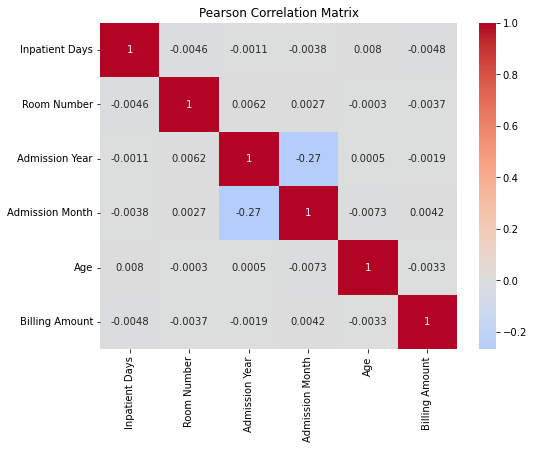

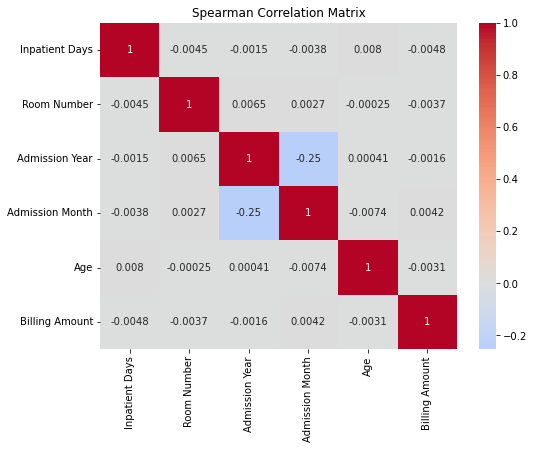

In [105]:
# Define the columns to analyze
columns_to_analyze = ['Inpatient Days','Room Number', 'Admission Year', 'Admission Month',  'Age', 'Billing Amount']
# 'Room Number'

# Calculate Pearson correlation
correlation_matrix = df[columns_to_analyze].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Calculate Spearman correlation
correlation_matrix_spearman = df[columns_to_analyze].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(correlation_matrix_spearman)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap="coolwarm", center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

Pearson Correlation Matrix:
                    Inpatient Days  Room Number  Admission Year  \
Inpatient Days            1.000000    -0.004563       -0.001125   
Room Number              -0.004563     1.000000        0.006231   
Admission Year           -0.001125     0.006231        1.000000   
Admission Month          -0.003800     0.002729       -0.266640   
Age                       0.008022    -0.000305        0.000504   
Log Per Day Amount       -0.612203     0.001141        0.000685   

                    Admission Month       Age  Log Per Day Amount  
Inpatient Days            -0.003800  0.008022           -0.612203  
Room Number                0.002729 -0.000305            0.001141  
Admission Year            -0.266640  0.000504            0.000685  
Admission Month            1.000000 -0.007310            0.005746  
Age                       -0.007310  1.000000           -0.008532  
Log Per Day Amount         0.005746 -0.008532            1.000000  

Spearman Correlation Matr

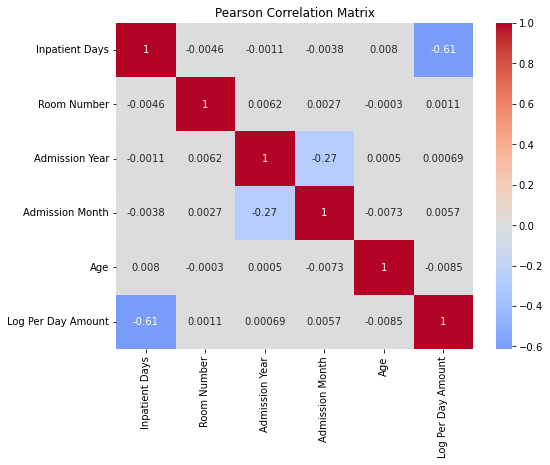

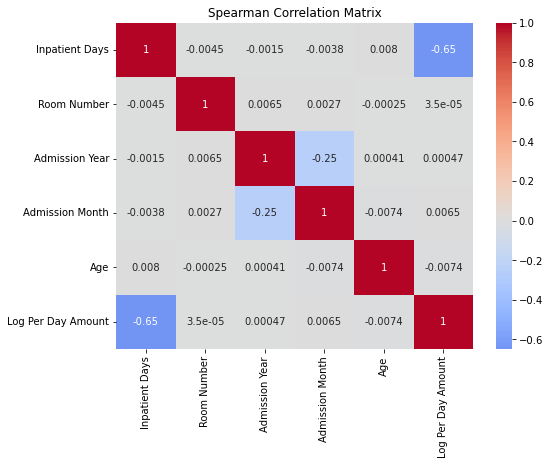

In [106]:
# Define the columns to analyze
columns_to_analyze = ['Inpatient Days', 'Room Number','Admission Year', 'Admission Month',  'Age', 'Log Per Day Amount']
# 'Room Number'

# Calculate Pearson correlation
correlation_matrix = df[columns_to_analyze].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Calculate Spearman correlation
correlation_matrix_spearman = df[columns_to_analyze].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(correlation_matrix_spearman)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap="coolwarm", center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

Models For Billing Amount 
Select Features 
Blood Type, Date of Admission, Doctor, Hospital, Room Number, Discharge Date

In [108]:
df_new = df.drop(columns=['Name', 'Inpatient Days', 'Admission Year', 'Admission Month', 'Age', 'Gender', 'Test Results', 
                                   'Admission Type', 'Insurance Provider', 'Medication', 'Medical Condition'])
df_new.head()

,Blood Type,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,Per Day Amount,Log Per Day Amount
0,B-,2024-01-31,Matthew Smith,Sons and Miller,18856.281306,328,2024-02-02,6285.427102,8.745989
1,A+,2019-08-20,Samantha Davies,Kim Inc,33643.327287,265,2019-08-26,4806.189612,8.477660
2,A-,2022-09-22,Tiffany Mitchell,Cook PLC,27955.096079,205,2022-10-07,1747.193505,7.465766
3,O+,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",37909.782410,450,2020-12-18,1222.896207,7.108977
4,AB+,2022-09-19,Kathleen Hanna,White-White,14238.317814,458,2022-10-09,678.015134,6.519170


In [122]:
# Define the selected columns and target variable
# selected_columns = ['Blood Type', 'Date of Admission', 'Doctor', 'Hospital',
#                     'Per Day Amount', 'Log Per Day Amount']

selected_columns = ['Blood Type', 'Discharge Date', 'Date of Admission', 'Doctor', 'Hospital','Room Number']

target = 'Billing Amount'

# Encode categorical variables
data_encoded = df_new.copy()
for col in ['Blood Type', 'Doctor', 'Hospital']:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Convert dates to numerical features (e.g., timestamp)
data_encoded['Date of Admission'] = pd.to_datetime(data_encoded['Date of Admission']).astype(int) / 10**9
data_encoded['Discharge Date'] = pd.to_datetime(data_encoded['Discharge Date']).astype(int) / 10**9

# Define features (X) and target (y)
X = data_encoded[selected_columns]
y = data_encoded[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_lr = linear_model.predict(X_train)
y_pred_lr = linear_model.predict(X_test)


# Evaluate Linear Regression
#Training Error 
train_mse_lr = mean_squared_error(y_train, y_train_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_lr)
train_rmse_lr = mean_squared_error(y_train, y_train_lr, squared=False)
train_mean_actual = y_train.mean()
train_accuracy_mae_lr = 1 - (train_mae_lr / train_mean_actual)
train_accuracy_rmse_lr = 1 - (train_rmse_lr / train_mean_actual)
#Testing Error 
test_mse_lr = mean_squared_error(y_test, y_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_lr)
test_rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
test_mean_actual = y_test.mean()
test_accuracy_mae_lr = 1 - (test_mae_lr / test_mean_actual)
test_accuracy_rmse_lr = 1 - (test_rmse_lr / test_mean_actual)

print("Linear Regression Performance:")

print(f"Train Mean Absolute Error (MAE): {train_mae_lr:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_lr:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_lr:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (Linear Regression): {train_accuracy_mae_lr:.2f}")
print(f"Train Accuracy based on RMSE (Linear Regression): {train_accuracy_rmse_lr:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_lr:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_lr:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_lr:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (Linear Regression): {test_accuracy_mae_lr:.2f}")
print(f"Test Accuracy based on RMSE (Linear Regression): {test_accuracy_rmse_lr:.2f}")
print(f"")
print(f"R-squared (R²): {r2_lr:.2f}")

Linear Regression Performance:
Train Mean Absolute Error (MAE): 12267.55
Train Mean Squared Error (MSE): 200983878.56
Train Root Mean Squared Error (RMSE): 14176.88

Train Accuracy based on MAE (Linear Regression): 0.52
Train Accuracy based on RMSE (Linear Regression): 0.45

Test Mean Absolute Error (MAE): 12267.03
Test Mean Squared Error (MSE): 200774006.38
Test Root Mean Squared Error (RMSE): 14169.47

Test Accuracy based on MAE (Linear Regression): 0.52
Test Accuracy based on RMSE (Linear Regression): 0.45

R-squared (R²): -0.00


In [124]:

# Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_train_lar = lasso_model.predict(X_train)
y_pred_lar = lasso_model.predict(X_test)

# Get feature importance scores
importance = np.abs(lasso_model.coef_)
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Sort the DataFrame by importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Evaluate Lasso Regression
#Train 
train_mse_lar = mean_squared_error(y_train, y_train_lar)
train_mae_lar = mean_absolute_error(y_train, y_train_lar)
train_rmse_lar = mean_squared_error(y_train, y_train_lar, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_lar = 1 - (train_mae_lar / train_mean_actual)
train_accuracy_rmse_lar = 1 - (train_rmse_lar / train_mean_actual)

#test
test_mse_lar = mean_squared_error(y_test, y_pred_lar)
test_mae_lar = mean_absolute_error(y_test, y_pred_lar)
test_rmse_lar = mean_squared_error(y_test, y_pred_lar, squared=False)
r2_lar = r2_score(y_test, y_pred_lar)

test_mean_actual = y_test.mean()
test_accuracy_mae_lar = 1 - (test_mae_lar / test_mean_actual)
test_accuracy_rmse_lar = 1 - (test_rmse_lar / test_mean_actual)

print("Lasso Regression Performance:")

print(f"Train Mean Absolute Error (MAE): {train_mae_lar:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_lar:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_lar:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (LASSO Regression): {train_accuracy_mae_lar:.2f}")
print(f"Train Accuracy based on RMSE (LASSO Regression): {train_accuracy_rmse_lar:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_lar:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_lar:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_lar:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (LASSO Regression): {test_accuracy_mae_lar:.2f}")
print(f"Test Accuracy based on RMSE (LASSO Regression): {test_accuracy_rmse_lar:.2f}")
print(f"")
print(f"R-squared (R²): {r2_lar:.2f}")

             Feature  Importance
0         Blood Type   10.614631
5        Room Number    0.565769
4           Hospital    0.010600
3             Doctor    0.003822
2  Date of Admission    0.000016
1     Discharge Date    0.000015
Lasso Regression Performance:
Train Mean Absolute Error (MAE): 12267.70
Train Mean Squared Error (MSE): 200985330.71
Train Root Mean Squared Error (RMSE): 14176.93

Train Accuracy based on MAE (LASSO Regression): 0.52
Train Accuracy based on RMSE (LASSO Regression): 0.45

Test Mean Absolute Error (MAE): 12267.28
Test Mean Squared Error (MSE): 200782772.17
Test Root Mean Squared Error (RMSE): 14169.78

Test Accuracy based on MAE (LASSO Regression): 0.52
Test Accuracy based on RMSE (LASSO Regression): 0.45

R-squared (R²): -0.00


/Users/daray/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+12, tolerance: 8.822e+08
  model = cd_fast.enet_coordinate_descent(


In [125]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=6) 
knn_model.fit(X_train, y_train)
y_train_knn = knn_model.predict(X_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate K-Nearest Neighbors Regression
#Train 
train_mse_knn = mean_squared_error(y_train, y_train_knn)
train_mae_knn = mean_absolute_error(y_train, y_train_knn)
train_rmse_knn = mean_squared_error(y_train, y_train_knn, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_knn = 1 - (train_mae_knn / train_mean_actual)
train_accuracy_rmse_knn = 1 - (train_rmse_knn / train_mean_actual)
#test
test_mse_knn = mean_squared_error(y_test, y_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_pred_knn)
test_rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

test_mean_actual = y_test.mean()
test_accuracy_mae_knn = 1 - (test_mae_knn / test_mean_actual)
test_accuracy_rmse_knn = 1 - (test_rmse_knn / test_mean_actual)

print("KNN Regression Performance:")
print(f"Train Mean Absolute Error (MAE): {train_mae_knn:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_knn:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_knn:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (KNN): {train_accuracy_mae_knn:.2f}")
print(f"Train Accuracy based on RMSE (KNN): {train_accuracy_rmse_knn:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_knn:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_knn:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_knn:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (KNN): {test_accuracy_mae_knn:.2f}")
print(f"Test Accuracy based on RMSE (KNN): {test_accuracy_rmse_knn:.2f}")
print(f"")
print(f"R-squared (R²): {r2_knn:.2f}")

KNN Regression Performance:
Train Mean Absolute Error (MAE): 10707.59
Train Mean Squared Error (MSE): 163224754.72
Train Root Mean Squared Error (RMSE): 12775.94

Train Accuracy based on MAE (KNN): 0.58
Train Accuracy based on RMSE (KNN): 0.50

Test Mean Absolute Error (MAE): 12733.79
Test Mean Squared Error (MSE): 228116096.43
Test Root Mean Squared Error (RMSE): 15103.51

Test Accuracy based on MAE (KNN): 0.50
Test Accuracy based on RMSE (KNN): 0.41

R-squared (R²): -0.14


In [126]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest 
#Train 
train_mse_rf = mean_squared_error(y_train, y_train_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_rf)
train_rmse_rf = mean_squared_error(y_train, y_train_rf, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_rf = 1 - (train_mae_rf / train_mean_actual)
train_accuracy_rmse_rf = 1 - (train_rmse_rf / train_mean_actual)
#Test
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

test_mean_actual = y_test.mean()
test_accuracy_mae_rf = 1 - (test_mae_rf / test_mean_actual)
test_accuracy_rmse_rf = 1 - (test_rmse_rf / test_mean_actual)

print("Random Forest Regression Performance:")
print(f"Train Mean Absolute Error (MAE): {train_mae_rf:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_rf:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_rf:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (Random Forest): {train_accuracy_mae_rf:.2f}")
print(f"Train Accuracy based on RMSE (Random Forest): {train_accuracy_rmse_rf:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_rf:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_rf:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_rf:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (Random Forest): {test_accuracy_mae_rf:.2f}")
print(f"Test Accuracy based on RMSE (Random Forest): {test_accuracy_rmse_rf:.2f}")
print(f"")
print(f"R-squared (R²): {r2_rf:.2f}")

Random Forest Regression Performance:
Train Mean Absolute Error (MAE): 4215.30
Train Mean Squared Error (MSE): 26035098.46
Train Root Mean Squared Error (RMSE): 5102.46

Train Accuracy based on MAE (Random Forest): 0.84
Train Accuracy based on RMSE (Random Forest): 0.80

Test Mean Absolute Error (MAE): 11276.69
Test Mean Squared Error (MSE): 183019748.32
Test Root Mean Squared Error (RMSE): 13528.48

Test Accuracy based on MAE (Random Forest): 0.56
Test Accuracy based on RMSE (Random Forest): 0.47

R-squared (R²): 0.09


In [127]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_train_gb= gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
#Train 
train_mse_gb = mean_squared_error(y_train, y_train_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_gb)
train_rmse_gb = mean_squared_error(y_train, y_train_gb, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_gb = 1 - (train_mae_gb / train_mean_actual)
train_accuracy_rmse_gb = 1 - (train_rmse_gb / train_mean_actual)
#Test
test_mse_gb = mean_squared_error(y_test, y_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_gb)
test_rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

test_mean_actual = y_test.mean()
test_accuracy_mae_gb = 1 - (test_mae_gb / test_mean_actual)
test_accuracy_rmse_gb = 1 - (test_rmse_gb / test_mean_actual)

print("Gradient Boosting Regression Performance:")
print(f"Train Mean Absolute Error (MAE): {train_mae_gb:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_gb:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_gb:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (Gradient Boosting): {train_accuracy_mae_gb:.2f}")
print(f"Train Accuracy based on RMSE (Gradient Boosting): {train_accuracy_rmse_gb:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_gb:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_gb:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_gb:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (Gradient Boosting): {test_accuracy_mae_gb:.2f}")
print(f"Test Accuracy based on RMSE (Gradient Boosting): {test_accuracy_rmse_gb:.2f}")
print(f"")
print(f"R-squared (R²): {r2_gb:.2f}")

Gradient Boosting Regression Performance:
Train Mean Absolute Error (MAE): 12177.99
Train Mean Squared Error (MSE): 198275899.37
Train Root Mean Squared Error (RMSE): 14081.05

Train Accuracy based on MAE (Gradient Boosting): 0.52
Train Accuracy based on RMSE (Gradient Boosting): 0.45

Test Mean Absolute Error (MAE): 12267.22
Test Mean Squared Error (MSE): 200998400.80
Test Root Mean Squared Error (RMSE): 14177.39

Test Accuracy based on MAE (Gradient Boosting): 0.52
Test Accuracy based on RMSE (Gradient Boosting): 0.44

R-squared (R²): -0.00


Models for Log Per Day Amount 
Select Features 
Blood Type, Date of Admission, Doctor, Hospital, Room number, Discharge Date, Inpatient Days 

In [131]:
df_new = df.drop(columns=['Name',  'Admission Year', 'Admission Month',  'Age', 'Gender', 'Test Results', 
                                   'Admission Type', 'Insurance Provider', 'Medication', 'Medical Condition'])
df_new.head()

,Blood Type,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,Inpatient Days,Per Day Amount,Log Per Day Amount
0,B-,2024-01-31,Matthew Smith,Sons and Miller,18856.281306,328,2024-02-02,3,6285.427102,8.745989
1,A+,2019-08-20,Samantha Davies,Kim Inc,33643.327287,265,2019-08-26,7,4806.189612,8.477660
2,A-,2022-09-22,Tiffany Mitchell,Cook PLC,27955.096079,205,2022-10-07,16,1747.193505,7.465766
3,O+,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",37909.782410,450,2020-12-18,31,1222.896207,7.108977
4,AB+,2022-09-19,Kathleen Hanna,White-White,14238.317814,458,2022-10-09,21,678.015134,6.519170


In [132]:
# Define the selected columns and target variable
# selected_columns = ['Blood Type', 'Date of Admission', 'Doctor', 'Hospital',
#                     'Per Day Amount', 'Log Per Day Amount']

selected_columns = ['Blood Type', 'Inpatient Days','Discharge Date', 'Date of Admission', 'Doctor', 'Hospital','Room Number']

target = 'Log Per Day Amount'

# Encode categorical variables
data_encoded = df_new.copy()
for col in ['Blood Type', 'Doctor', 'Hospital']:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Convert dates to numerical features (e.g., timestamp)
data_encoded['Date of Admission'] = pd.to_datetime(data_encoded['Date of Admission']).astype(int) / 10**9
data_encoded['Discharge Date'] = pd.to_datetime(data_encoded['Discharge Date']).astype(int) / 10**9

# Define features (X) and target (y)
X = data_encoded[selected_columns]
y = data_encoded[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_lr = linear_model.predict(X_train)
y_pred_lr = linear_model.predict(X_test)


# Evaluate Linear Regression
#Training Error 
train_mse_lr = mean_squared_error(y_train, y_train_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_lr)
train_rmse_lr = mean_squared_error(y_train, y_train_lr, squared=False)
train_mean_actual = y_train.mean()
train_accuracy_mae_lr = 1 - (train_mae_lr / train_mean_actual)
train_accuracy_rmse_lr = 1 - (train_rmse_lr / train_mean_actual)
#Testing Error 
test_mse_lr = mean_squared_error(y_test, y_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_lr)
test_rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
test_mean_actual = y_test.mean()
test_accuracy_mae_lr = 1 - (test_mae_lr / test_mean_actual)
test_accuracy_rmse_lr = 1 - (test_rmse_lr / test_mean_actual)

print("Linear Regression Performance:")

print(f"Train Mean Absolute Error (MAE): {train_mae_lr:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_lr:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_lr:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (Linear Regression): {train_accuracy_mae_lr:.2f}")
print(f"Train Accuracy based on RMSE (Linear Regression): {train_accuracy_rmse_lr:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_lr:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_lr:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_lr:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (Linear Regression): {test_accuracy_mae_lr:.2f}")
print(f"Test Accuracy based on RMSE (Linear Regression): {test_accuracy_rmse_lr:.2f}")
print(f"")
print(f"R-squared (R²): {r2_lr:.2f}")

Linear Regression Performance:
Train Mean Absolute Error (MAE): 0.67
Train Mean Squared Error (MSE): 0.77
Train Root Mean Squared Error (RMSE): 0.88

Train Accuracy based on MAE (Linear Regression): 0.91
Train Accuracy based on RMSE (Linear Regression): 0.88

Test Mean Absolute Error (MAE): 0.68
Test Mean Squared Error (MSE): 0.77
Test Root Mean Squared Error (RMSE): 0.88

Test Accuracy based on MAE (Linear Regression): 0.91
Test Accuracy based on RMSE (Linear Regression): 0.88

R-squared (R²): 0.39


In [134]:
# Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_train_lar = lasso_model.predict(X_train)
y_pred_lar = lasso_model.predict(X_test)

# Get feature importance scores
importance = np.abs(lasso_model.coef_)
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Sort the DataFrame by importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Evaluate Lasso Regression
#Train 
train_mse_lar = mean_squared_error(y_train, y_train_lar)
train_mae_lar = mean_absolute_error(y_train, y_train_lar)
train_rmse_lar = mean_squared_error(y_train, y_train_lar, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_lar = 1 - (train_mae_lar / train_mean_actual)
train_accuracy_rmse_lar = 1 - (train_rmse_lar / train_mean_actual)

#test
test_mse_lar = mean_squared_error(y_test, y_pred_lar)
test_mae_lar = mean_absolute_error(y_test, y_pred_lar)
test_rmse_lar = mean_squared_error(y_test, y_pred_lar, squared=False)
r2_lar = r2_score(y_test, y_pred_lar)

test_mean_actual = y_test.mean()
test_accuracy_mae_lar = 1 - (test_mae_lar / test_mean_actual)
test_accuracy_rmse_lar = 1 - (test_rmse_lar / test_mean_actual)

print("Lasso Regression Performance:")

print(f"Train Mean Absolute Error (MAE): {train_mae_lar:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_lar:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_lar:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (LASSO Regression): {train_accuracy_mae_lar:.2f}")
print(f"Train Accuracy based on RMSE (LASSO Regression): {train_accuracy_rmse_lar:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_lar:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_lar:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_lar:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (LASSO Regression): {test_accuracy_mae_lar:.2f}")
print(f"Test Accuracy based on RMSE (LASSO Regression): {test_accuracy_rmse_lar:.2f}")
print(f"")
print(f"R-squared (R²): {r2_lar:.2f}")

             Feature    Importance
1     Inpatient Days  7.615974e-02
6        Room Number  1.778123e-05
5           Hospital  6.920079e-07
4             Doctor  1.224077e-07
3  Date of Admission  4.148537e-09
2     Discharge Date  4.111707e-09
0         Blood Type  0.000000e+00
Lasso Regression Performance:
Train Mean Absolute Error (MAE): 0.67
Train Mean Squared Error (MSE): 0.77
Train Root Mean Squared Error (RMSE): 0.88

Train Accuracy based on MAE (LASSO Regression): 0.91
Train Accuracy based on RMSE (LASSO Regression): 0.88

Test Mean Absolute Error (MAE): 0.68
Test Mean Squared Error (MSE): 0.77
Test Root Mean Squared Error (RMSE): 0.88

Test Accuracy based on MAE (LASSO Regression): 0.91
Test Accuracy based on RMSE (LASSO Regression): 0.88

R-squared (R²): 0.38


/Users/daray/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e+04, tolerance: 5.359e+00
  model = cd_fast.enet_coordinate_descent(


In [135]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=6) 
knn_model.fit(X_train, y_train)
y_train_knn = knn_model.predict(X_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate K-Nearest Neighbors Regression
#Train 
train_mse_knn = mean_squared_error(y_train, y_train_knn)
train_mae_knn = mean_absolute_error(y_train, y_train_knn)
train_rmse_knn = mean_squared_error(y_train, y_train_knn, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_knn = 1 - (train_mae_knn / train_mean_actual)
train_accuracy_rmse_knn = 1 - (train_rmse_knn / train_mean_actual)
#test
test_mse_knn = mean_squared_error(y_test, y_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_pred_knn)
test_rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

test_mean_actual = y_test.mean()
test_accuracy_mae_knn = 1 - (test_mae_knn / test_mean_actual)
test_accuracy_rmse_knn = 1 - (test_rmse_knn / test_mean_actual)

print("KNN Regression Performance:")
print(f"Train Mean Absolute Error (MAE): {train_mae_knn:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_knn:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_knn:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (KNN): {train_accuracy_mae_knn:.2f}")
print(f"Train Accuracy based on RMSE (KNN): {train_accuracy_rmse_knn:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_knn:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_knn:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_knn:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (KNN): {test_accuracy_mae_knn:.2f}")
print(f"Test Accuracy based on RMSE (KNN): {test_accuracy_rmse_knn:.2f}")
print(f"")
print(f"R-squared (R²): {r2_knn:.2f}")

KNN Regression Performance:
Train Mean Absolute Error (MAE): 0.58
Train Mean Squared Error (MSE): 0.59
Train Root Mean Squared Error (RMSE): 0.77

Train Accuracy based on MAE (KNN): 0.92
Train Accuracy based on RMSE (KNN): 0.90

Test Mean Absolute Error (MAE): 0.69
Test Mean Squared Error (MSE): 0.82
Test Root Mean Squared Error (RMSE): 0.90

Test Accuracy based on MAE (KNN): 0.91
Test Accuracy based on RMSE (KNN): 0.88

R-squared (R²): 0.34


In [136]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest 
#Train 
train_mse_rf = mean_squared_error(y_train, y_train_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_rf)
train_rmse_rf = mean_squared_error(y_train, y_train_rf, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_rf = 1 - (train_mae_rf / train_mean_actual)
train_accuracy_rmse_rf = 1 - (train_rmse_rf / train_mean_actual)
#Test
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

test_mean_actual = y_test.mean()
test_accuracy_mae_rf = 1 - (test_mae_rf / test_mean_actual)
test_accuracy_rmse_rf = 1 - (test_rmse_rf / test_mean_actual)

print("Random Forest Regression Performance:")
print(f"Train Mean Absolute Error (MAE): {train_mae_rf:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_rf:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_rf:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (Random Forest): {train_accuracy_mae_rf:.2f}")
print(f"Train Accuracy based on RMSE (Random Forest): {train_accuracy_rmse_rf:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_rf:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_rf:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_rf:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (Random Forest): {test_accuracy_mae_rf:.2f}")
print(f"Test Accuracy based on RMSE (Random Forest): {test_accuracy_rmse_rf:.2f}")
print(f"")
print(f"R-squared (R²): {r2_rf:.2f}")

Random Forest Regression Performance:
Train Mean Absolute Error (MAE): 0.23
Train Mean Squared Error (MSE): 0.09
Train Root Mean Squared Error (RMSE): 0.31

Train Accuracy based on MAE (Random Forest): 0.97
Train Accuracy based on RMSE (Random Forest): 0.96

Test Mean Absolute Error (MAE): 0.62
Test Mean Squared Error (MSE): 0.67
Test Root Mean Squared Error (RMSE): 0.82

Test Accuracy based on MAE (Random Forest): 0.92
Test Accuracy based on RMSE (Random Forest): 0.89

R-squared (R²): 0.46


In [137]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_train_gb= gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
#Train 
train_mse_gb = mean_squared_error(y_train, y_train_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_gb)
train_rmse_gb = mean_squared_error(y_train, y_train_gb, squared=False)

train_mean_actual = y_train.mean()
train_accuracy_mae_gb = 1 - (train_mae_gb / train_mean_actual)
train_accuracy_rmse_gb = 1 - (train_rmse_gb / train_mean_actual)
#Test
test_mse_gb = mean_squared_error(y_test, y_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_gb)
test_rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

test_mean_actual = y_test.mean()
test_accuracy_mae_gb = 1 - (test_mae_gb / test_mean_actual)
test_accuracy_rmse_gb = 1 - (test_rmse_gb / test_mean_actual)

print("Gradient Boosting Regression Performance:")
print(f"Train Mean Absolute Error (MAE): {train_mae_gb:.2f}")
print(f"Train Mean Squared Error (MSE): {train_mse_gb:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse_gb:.2f}")
print(f"")
print(f"Train Accuracy based on MAE (Gradient Boosting): {train_accuracy_mae_gb:.2f}")
print(f"Train Accuracy based on RMSE (Gradient Boosting): {train_accuracy_rmse_gb:.2f}")
print(f"")
print(f"Test Mean Absolute Error (MAE): {test_mae_gb:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse_gb:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse_gb:.2f}")
print(f"")
print(f"Test Accuracy based on MAE (Gradient Boosting): {test_accuracy_mae_gb:.2f}")
print(f"Test Accuracy based on RMSE (Gradient Boosting): {test_accuracy_rmse_gb:.2f}")
print(f"")
print(f"R-squared (R²): {r2_gb:.2f}")

Gradient Boosting Regression Performance:
Train Mean Absolute Error (MAE): 0.65
Train Mean Squared Error (MSE): 0.70
Train Root Mean Squared Error (RMSE): 0.84

Train Accuracy based on MAE (Gradient Boosting): 0.91
Train Accuracy based on RMSE (Gradient Boosting): 0.88

Test Mean Absolute Error (MAE): 0.65
Test Mean Squared Error (MSE): 0.71
Test Root Mean Squared Error (RMSE): 0.84

Test Accuracy based on MAE (Gradient Boosting): 0.91
Test Accuracy based on RMSE (Gradient Boosting): 0.88

R-squared (R²): 0.43
